# DecisionTree implementation with all possible data 

In [1]:
# imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
import importlib.util
spec = importlib.util.spec_from_file_location("module.name", "../functions.py")
functions = importlib.util.module_from_spec(spec)
spec.loader.exec_module(functions)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

# param values
criterion = ['entropy']
max_depth = list(range(1, 50, 1)) + list(range(20, 110, 10))
splitter = ['best', 'random']
min_samples_split = list(range(2, 16, 2))
max_features = ['auto', 'sqrt', 'log2', None]
# creating  grid instance
params = dict(criterion=criterion, max_depth=max_depth, splitter=splitter, min_samples_split=min_samples_split,
              max_features=max_features)

In [2]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## DecisionTree with just using default values

In [3]:
# get data
X, y = functions.get_data(type="_new")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
# predict test values
y_pred_basic = clf.predict(X_test)

In [6]:
# calculate F1 score
f1_basic = f1_score(y_test, y_pred_basic)
"F1 score is = {0}".format(f1_basic)

'F1 score is = 0.2731310140636566'

In [7]:
# creating KNN instance
clf = DecisionTreeClassifier()
clfCV = GridSearchCV(clf, params, cv=10, scoring='accuracy', verbose=10, n_jobs=-1, refit=True)

clfCV.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 3248 candidates, totalling 32480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1741s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0738s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1985s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 619 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 879 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 1439 tasks      | elapse

[Parallel(n_jobs=-1)]: Done 17332 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 17562 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 17796 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 18030 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 18268 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 18506 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 18748 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 18990 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 19236 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 19482 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 19732 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 19982 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 20236 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 20490 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 20748 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 21006 tasks 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [8]:
clf = clfCV.best_estimator_
clf.fit(X_train, y_train.values.ravel())
# predict test values
y_pred_basic = clf.predict(X_test)
# calculate F1 score
f1_basic = f1_score(y_test, y_pred_basic)
print("F1 score is = {0}".format(f1_basic))
print("Accuracy is = {0}".format(accuracy_score(y_test, y_pred_basic)))

F1 score is = 0.007194244604316546
Accuracy is = 0.8398514564233492


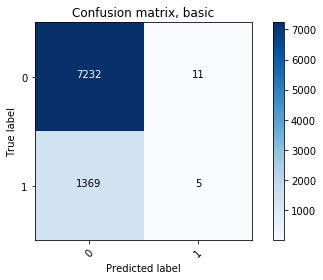

In [9]:
cm_basis = confusion_matrix(y_test, y_pred_basic)


np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_basis, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

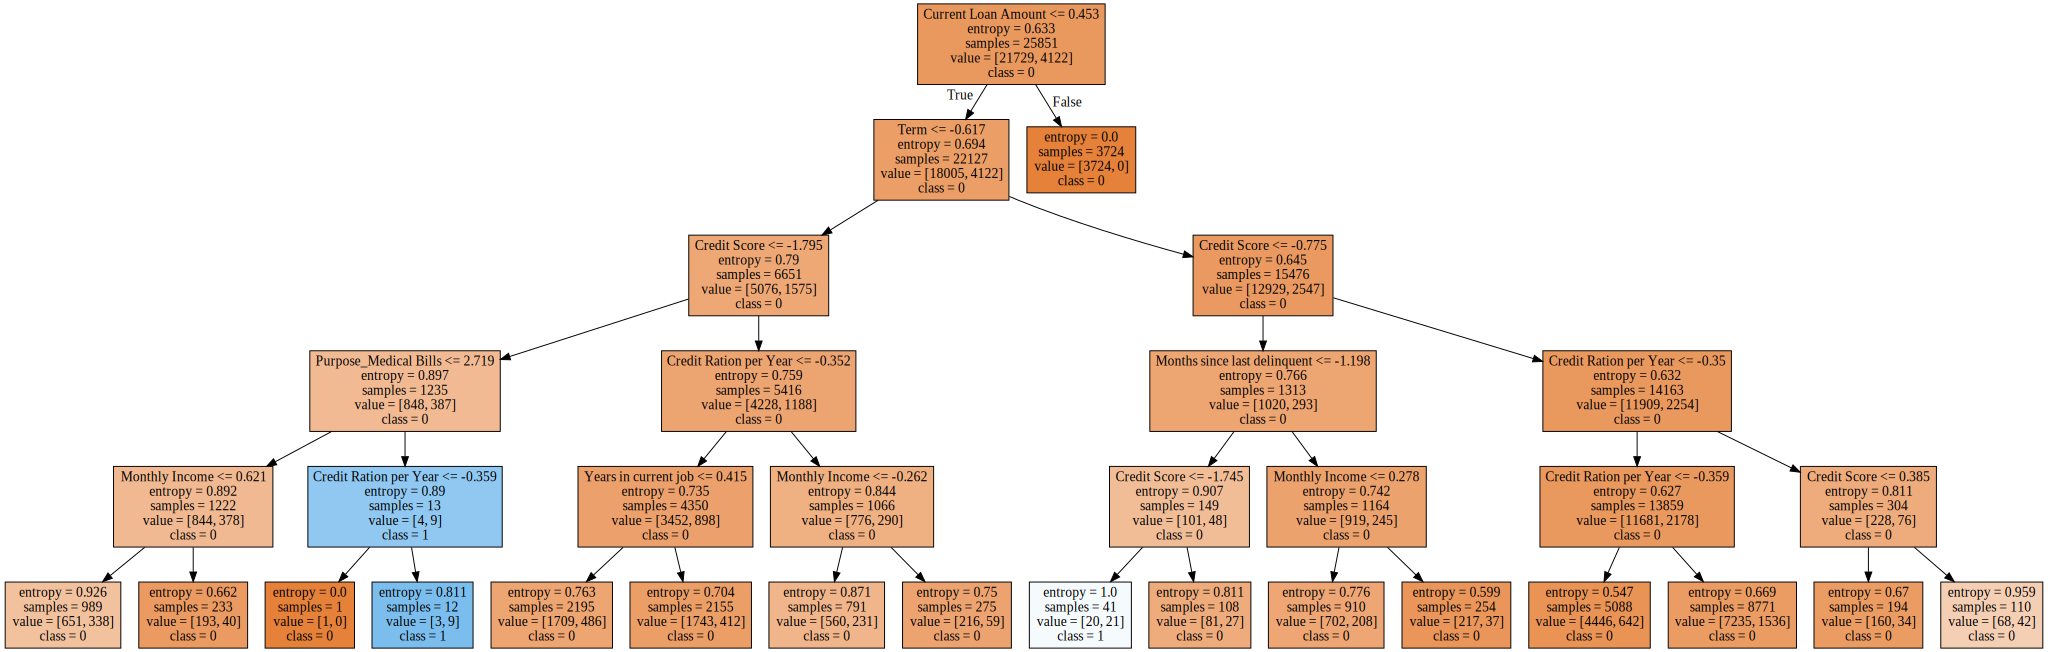

In [10]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
labels = X.columns

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

## DecisionTree with removed outliers

In [11]:
# get data
X, y = functions.get_data(type="__removeoutliers_new")
# split dataset into train and test data
X_train, X_test, y_train, y_test_outliers = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)
# (7983, 1)
X_test.shape

(6399, 36)

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
# predict test values
y_pred_outliers = clf.predict(X_test)

In [14]:
# calculate F1 score
# calculate F1 score
f1_outliers = f1_score(y_test_outliers, y_pred_outliers)
"F1 score is = {0}".format(f1_outliers)

'F1 score is = 0.28656420426375806'

In [15]:
# creating KNN instance
clf = DecisionTreeClassifier()
clfCV = GridSearchCV(clf, params, cv=10, scoring='accuracy', verbose=10, n_jobs=-1, refit=True)

clfCV.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 3248 candidates, totalling 32480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0222s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 2

[Parallel(n_jobs=-1)]: Done 18292 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 18514 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 18736 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 18962 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 19188 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 19418 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 19648 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 19882 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 20116 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 20354 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 20592 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 20834 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 21076 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 21322 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 21568 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 21818 tasks 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [16]:
clf = clfCV.best_estimator_
clf.fit(X_train, y_train.values.ravel())
# predict test values
y_pred_outliers = clf.predict(X_test)

# calculate F1 score
f1_outliers = f1_score(y_test_outliers, y_pred_outliers)
print("F1 score is = {0}".format(f1_outliers))
print("Accuracy is = {0}".format(accuracy_score(y_test_outliers, y_pred_outliers)))

F1 score is = 0.001921229586935639
Accuracy is = 0.8376308798249726


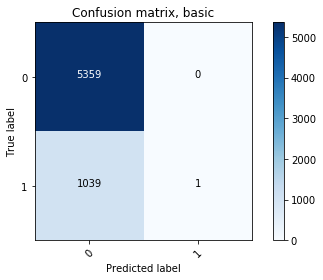

In [17]:
cm_basis = confusion_matrix(y_test_outliers, y_pred_outliers)


np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_basis, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

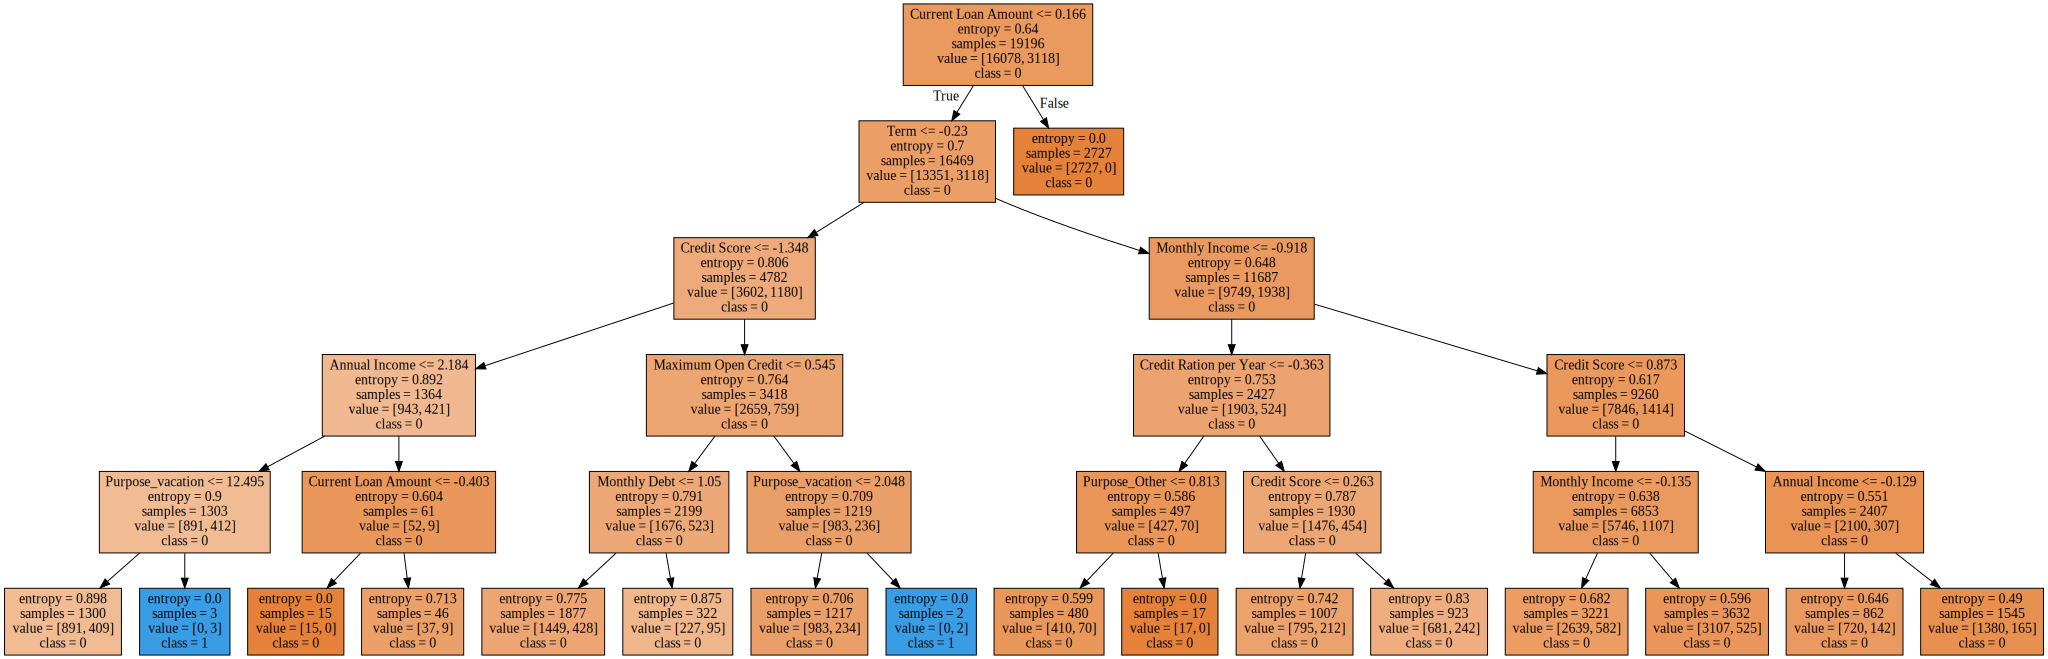

In [18]:
labels = X.columns

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

## DecisionTree with PCA features

In [19]:
# get data
X, y = functions.get_data(type="__PCA_new")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# predict test values
y_pred_PCA = clf.predict(X_test)

In [22]:
# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
"F1 score is = {0}".format(f1_PCA)

'F1 score is = 0.9989086940705711'

In [23]:
# creating KNN instance
clf = DecisionTreeClassifier()
clfCV = GridSearchCV(clf, params, cv=10, scoring='accuracy', verbose=10, n_jobs=-1, refit=True)

clfCV.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 3248 candidates, totalling 32480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0602s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1487s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0847s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [24]:
clf = clfCV.best_estimator_
clf.fit(X_train, y_train.values.ravel())
# predict test values
y_pred_PCA = clf.predict(X_test)

# calculate F1 score
f1_PCA = f1_score(y_test, y_pred_PCA)
print("F1 score is = {0}".format(f1_PCA))
print("Accuracy is = {0}".format(accuracy_score(y_test, y_pred_PCA)))

F1 score is = 1.0
Accuracy is = 1.0


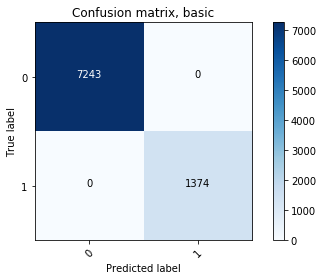

In [25]:
cm_basis = confusion_matrix(y_test, y_pred_PCA)


np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_basis, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

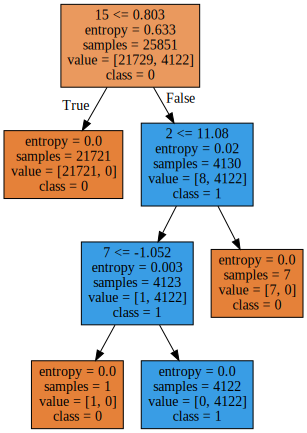

In [26]:
labels = X.columns

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

## DecisionTree with feature tools features

In [27]:
# get data
X, y = functions.get_data(type="__FTs_new")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
# predict test values
y_pred_FT = clf.predict(X_test)

In [30]:
# calculate F1 score
f1_FT = f1_score(y_test, y_pred_FT)
"F1 score is = {0}".format(f1_FT)

'F1 score is = 0.24125874125874125'

In [31]:
# creating KNN instance
clf = DecisionTreeClassifier()
clfCV = GridSearchCV(clf, params, cv=10, scoring='accuracy', verbose=10, n_jobs=-1, refit=True)

clfCV.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 3248 candidates, totalling 32480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0450s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1319s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1182s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 1428 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Batch computation too slow 

[Parallel(n_jobs=-1)]: Done 12718 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0083s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 12844 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1808s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 12987 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 13193 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2184s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 13368 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 13473 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1983s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 13678 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1251s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 13889 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 13998 tasks      | elapsed:  9.1min
[Parallel

[Parallel(n_jobs=-1)]: Done 26241 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1849s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 26432 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2112s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 26764 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1946s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 26943 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 27281 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0634s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 27472 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1837s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 27803 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1209s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 28024 tasks      | elapsed

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [32]:
clf = clfCV.best_estimator_
clf.fit(X_train, y_train.values.ravel())
# predict test values
y_pred_FT = clf.predict(X_test)

# calculate F1 score
f1_FT = f1_score(y_test, y_pred_FT)
print("F1 score is = {0}".format(f1_FT))
print("Accuracy is = {0}".format(accuracy_score(y_test, y_pred_FT)))

F1 score is = 0.0
Accuracy is = 0.8405274725274725


/home/debian/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


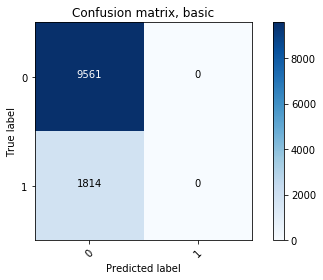

In [33]:
cm_basis = confusion_matrix(y_test, y_pred_FT)


np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_basis, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

In [34]:
#labels = X.columns

#graph = Source(export_graphviz(clf, out_file=None
#   , feature_names=labels, class_names=['0', '1'] 
#   , filled = True))

#display(SVG(graph.pipe(format='svg')))

## DecisionTree with polynominal features

In [35]:
# get data
X, y = functions.get_data(type="__polynomial_new")
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, stratify=y)

In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
# predict test values
y_pred_poly = clf.predict(X_test)

In [38]:
# calculate F1 score
f1_poly = f1_score(y_test, y_pred_poly)
"F1 score is = {0}".format(f1_poly)

'F1 score is = 0.26038472260942297'

In [39]:
# creating KNN instance
clf = DecisionTreeClassifier()
clfCV = GridSearchCV(clf, params, cv=10, scoring='accuracy', verbose=10, n_jobs=-1, refit=True)

clfCV.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 3248 candidates, totalling 32480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0308s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 992 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1172 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1556 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 176

[Parallel(n_jobs=-1)]: Done 18719 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 18965 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 19211 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 19461 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 19711 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 19965 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 20219 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 20477 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 20735 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 20997 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 21259 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 21525 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 21791 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 22061 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 22331 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 22605 tasks 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['entropy'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [40]:
clf = clfCV.best_estimator_
clf.fit(X_train, y_train.values.ravel())
# predict test values
y_pred_poly = clf.predict(X_test)

# calculate F1 score
f1_poly = f1_score(y_test, y_pred_poly)
print("F1 score is = {0}".format(f1_poly))
print("Accuracy is = {0}".format(accuracy_score(y_test, y_pred_poly)))

F1 score is = 0.003289473684210526
Accuracy is = 0.8401758241758241


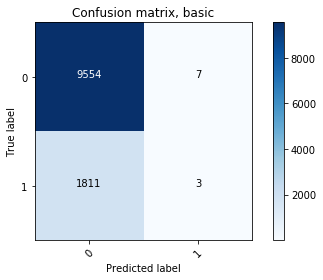

In [41]:
cm_basis = confusion_matrix(y_test, y_pred_poly)


np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_basis, classes=['0','1'],
                      title='Confusion matrix, basic')
plt.show()

In [42]:
#labels = X.columns

#graph = Source(export_graphviz(clf, out_file=None
#   , feature_names=labels, class_names=['0', '1'] 
#   , filled = True))

#display(SVG(graph.pipe(format='svg')))